In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Potential questions
1. What games sell?
    - By genre
    - Platform
    - 
2. Is there any relationship between critical scores and sales?
    - What about user scores?
    - By region?
    
3. Have the developers/publishers that make games changed over time?
   

In [2]:
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# Video Game Sales Data

The dataset I will be using here is video game sales data as of December 22, 2016.  The dataset contains general information on the game (name, platform, release year) as well as sales data broken up by region (NA, EU, JP, Other, and total or 'Global').  A smaller subset of the data contains review scores critical scoring from the review aggregator website metacritic.com.  

A couple note about this dataset.  It is not a list of EVERY video game ever sold, only the top ~16k.  Furthermore, as stated above, there 

In [3]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [4]:
games.shape

(16719, 16)

In [5]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
#games = games.dropna()

In [7]:
games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Text(0.5,1,'Total Games by System')

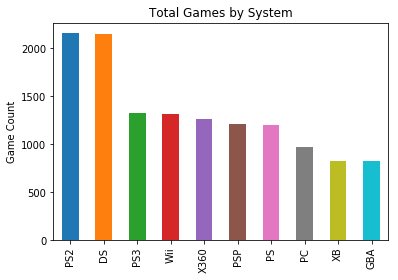

In [8]:
games.Platform.value_counts().head(10).plot(kind='bar')
plt.ylabel('Game Count')
plt.title('Total Games by System')

In [9]:
games.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


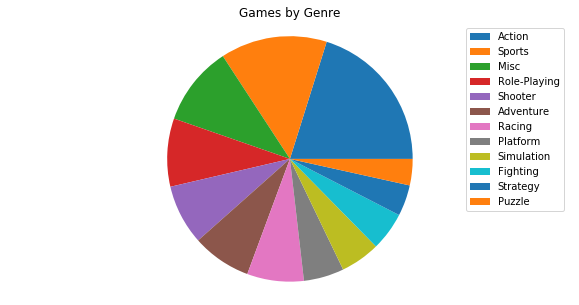

In [10]:
genre = games.Genre.value_counts()
# genre_counts = pd.DataFrame(genre.)

plt.figure(figsize=(10, 5))
plt.pie(genre)
plt.axis('equal')
plt.title('Games by Genre')
plt.legend(genre.index)

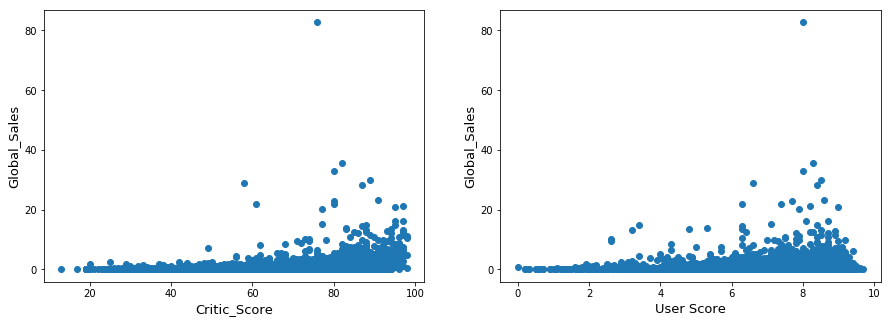

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x = games['Critic_Score'], y = games['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)

gamefloat = games['User_Score'].replace('tbd', np.nan)
plt.subplot(1, 2, 2)
plt.scatter(x = gamefloat.astype(float), y = games['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('User Score', fontsize=13)

plt.show()

In [12]:
score = games['Critic_Score']
score.head(10)

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
5     NaN
6    89.0
7    58.0
8    87.0
9     NaN
Name: Critic_Score, dtype: float64

In [13]:
score = games['User_Score']
score.head(10)

0      8
1    NaN
2    8.3
3      8
4    NaN
5    NaN
6    8.5
7    6.6
8    8.4
9    NaN
Name: User_Score, dtype: object

Text(0,0.5,'Games Sold (in millions)')

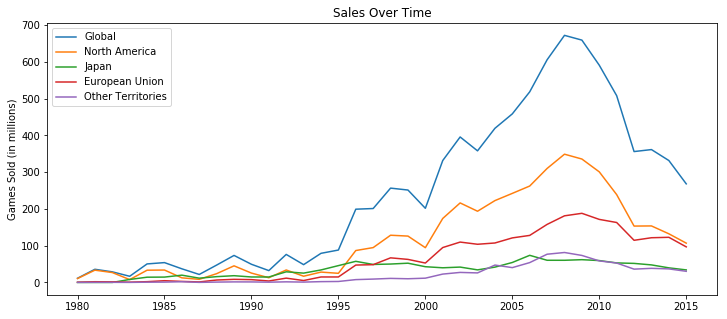

In [23]:
drop = games[~(games['Year_of_Release'] >= 2016.0)]
release = drop.groupby('Year_of_Release').aggregate(np.sum)
#print(release)

fig = plt.figure(figsize=(12, 5))
plt.plot(release['Global_Sales'])
plt.plot(release['NA_Sales'])
plt.plot(release['JP_Sales'])
plt.plot(release['EU_Sales'])
plt.plot(release['Other_Sales'])

plt.legend(['Global', 'North America', 'Japan', 'European Union', 'Other Territories'])
plt.title('Sales Over Time')
plt.ylabel('Games Sold (in millions)')

In [15]:
bad_data = games[~(games['Year_of_Release'] <= 2017.0)]
bad_data.shape

(270, 16)

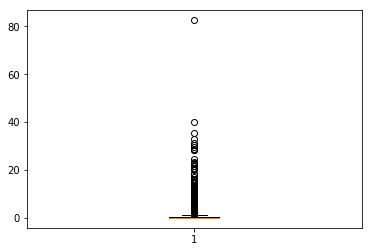

In [16]:
salesbox = games['Global_Sales']
plt.boxplot(salesbox)
plt.show()

TypeError: nan is not a string

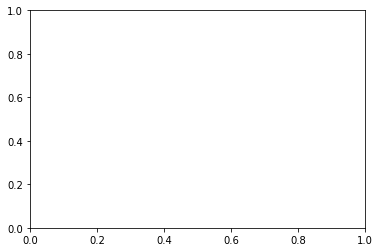

In [17]:
index = np.arange(len(games['Name']))
plt.bar(games['Name'], games['Global_Sales'])[:10]
plt.show()

In [ ]:
games.isnull().sum()

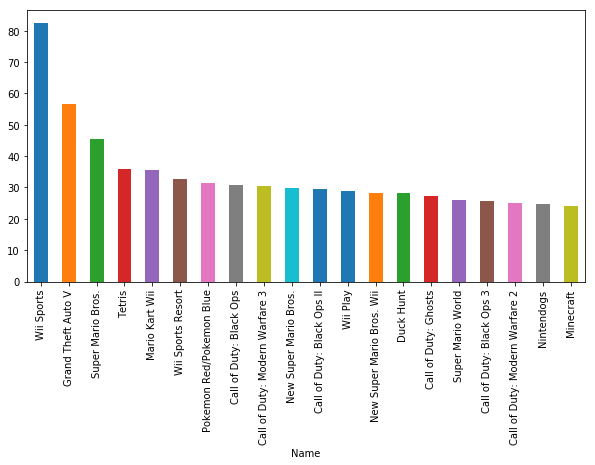

In [55]:
dropyear = games.drop(['Year_of_Release'], axis=1)

namegame = dropyear.groupby('Name').aggregate(np.sum).sort_values(by=['Global_Sales'], ascending=False)
namegame.Global_Sales.head(20)[0:51].plot(kind='bar', figsize=(10,5))

## Further Research

